# Indicadores de felicidade pelo mundo em 2023

Integrantes do grupo:
* Alexandre Zamora Zerbini Denigres
* Lucas Vinícius Santos De Lima
* Rayssa R. Oliveira De Faria
* Thiago Manata Michaelsen

<br>

**Resumo**

O trabalho busca explorar, utilizando-se da base de dados "*World Happiness Report up to 2023*", disponível no [Kaggle](https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors), as métricas de felicidade e os fatores que influenciam o bem-estar em escala global, se utilizando de ferramentas estatísticas que nos auxiliem a entender as relações estabelecidas e até mesmo possibilitar a criação de novas.

## Introdução

O relatório *World Happiness Report* é publicado pela *Sustainable Development Solutions Network* em [worldhappiness.report](https://worldhappiness.report), a partir de dados fornecidos pela *Gallup World Poll* (GWP).

Além da pontuação de felicidade em si, há também outros 6 indicadores que acompanham a base e que permitem fazer associações e análises que possam tentar explicar esses valores e suas variações ao longo do tempo.

Abaixo são listadas as medidas trazidas pela base de dados (definições obtidas do [apêndice do relatório de 2023](https://happiness-report.s3.amazonaws.com/2023/WHR+23_Statistical_Appendix.pdf)):
1. ***hapiness_score*** (pontuação de felicidade): valores de 0 a 10 (em que 10 representa a melhor vida possível e 0 a pior vida possível), baseados na "Cantril ladder" (escada de Cantril) obtidos da pesquisa feita pela GWP
2. ***gdp_per_capita*** (PIB per capita): estimado em paridade de poder de compra a preços internacionais constantes de 2017 em dólares pelo *World Development Indicators*
3. ***healthy_life_expectancy*** (expectativa de vida saudável): medida fornecida pela OMS (interpolada e extrapolada para os anos sem dados)

> Todas as seguintes são calculadas a partir das respostas binárias (ou seja, "sim" - 1 - ou "não" - 0) às perguntas feitas na pesquisa realizada pela GWP:

4. ***social_support*** (rede de apoio - "ter alguém para contar em momentos difíceis"): média nacional das respostas à pergunta "Se você estiver com problemas, você possui parentes ou amigos com quem você pode contar para ajudá-lo sempre que precisar?"
5. ***freedom_to_make_life_choices*** (liberdade para fazer escolhas de vida): média nacional das respostas à pergunta "Você está satisfeito com a sua liberdade de escolher o que fazer com a sua vida?"
6. ***generosity*** (generosidade): resíduo da regressão da média nacional de respostas à pergunta "Você doou dinheiro para uma instituição de caridade no último mês?" no PIB per capita
7. ***perceptions_of_corruption*** (percepção de corrupção): média nacional das respostas às duas perguntas "A corrupção está difundida em todo o governo ou não?" e "A corrupção está difundida nas empresas?" (percepção geral obtida pela média entre as duas respostas)





## 1. Configurando arquivos e importando biliotecas

In [ ]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from google.colab import files

In [ ]:
# Importação das credenciais do Kaggle (arquivo 'kaggle.json')

files.upload()

In [ ]:
# Instalação da biblioteca do Kaggle

!pip install -q kaggle

# Configurações para utilização do arquivo 'kaggle.json'

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download do zip contendo as bases de dados

!kaggle datasets download -d sazidthe1/global-happiness-scores-and-factors

# Extração do zip:

!unzip global-happiness-scores-and-factors.zip

## 2. Leitura e tratamendo de Dados

In [ ]:
# Concatenação de arquivos CSV para DataFrame

dfs_anos = dict()

for ano in range (2015, 2024):
  df_ano = pd.read_csv('./WHR_' + str(ano) + '.csv', low_memory = False)
  df_ano['year'] = ano
  dfs_anos[str(ano)] = df_ano

df = pd.concat(dfs_anos.values(), ignore_index=True)

# Correção de inconsistências da base de dados

df = df.dropna()
df['country'].replace('Somaliland region', 'Somaliland Region', regex=True, inplace=True)

<ipython-input-4-3df57e049b03>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'].replace('Somaliland region', 'Somaliland Region', regex=True, inplace=True)


In [ ]:
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800,2023
1363,Zimbabwe,Sub-Saharan Africa,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700,2023
1364,Sierra Leone,Sub-Saharan Africa,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100,2023
1365,Lebanon,Middle East and North Africa,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700,2023


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1365 non-null   object 
 1   region                        1365 non-null   object 
 2   happiness_score               1365 non-null   float64
 3   gdp_per_capita                1365 non-null   float64
 4   social_support                1365 non-null   float64
 5   healthy_life_expectancy       1365 non-null   float64
 6   freedom_to_make_life_choices  1365 non-null   float64
 7   generosity                    1365 non-null   float64
 8   perceptions_of_corruption     1365 non-null   float64
 9   year                          1365 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 117.3+ KB


In [ ]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000
mean,5.440500,1.018542,1.045338,0.583980,0.450919,0.196364,0.132322,2018.901099
std,1.118053,0.453085,0.331248,0.245196,0.156780,0.113328,0.112583,2.560363
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.596000,0.696000,0.832044,0.402048,0.356000,0.115000,0.056767,2017.000000
50%,5.440000,1.041000,1.083000,0.612448,0.467735,0.182700,0.097000,2019.000000
75%,6.255000,1.338000,1.299370,0.777625,0.569000,0.252960,0.166000,2021.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000


## 3. Manipulaçao dos Dados

### 3.1 Obtendo a amplitude e variancia

In [ ]:
# calculo de amplitude e variancia

print(f"A amplitude do happiness_score é de {max(df['happiness_score']) - min(df['happiness_score'])}")
print(f"A variância do happiness_score é de {np.var(df['happiness_score'])}")
print(f"A amplitude do gdp_per_capita é de {max(df['gdp_per_capita']) - min(df['gdp_per_capita'])}")

A amplitude do happiness_score é de 5.983
A variância do happiness_score é de 1.2491269060916044
A amplitude do gdp_per_capita é de 2.209


DataFrame com os dados globais foram observados que a média do Índice de Felicidade é de 5.44, contendo como quartis os valores 4.596, 5.44 e 6.255 para 25, 50 e 75%, respectivamente. A amplitude, variância e desvio padrão para o Índice de Felicidade foram de 5.983, 1.249 e 1.118, respectivamente.

### 3.2 Plotando o histograma geral

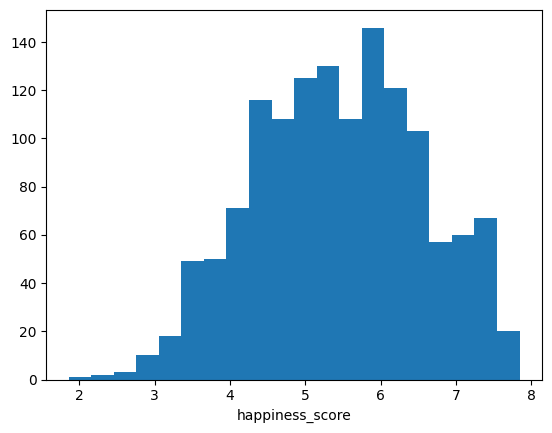

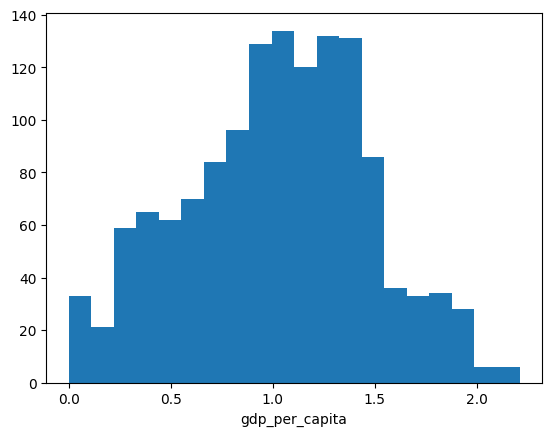

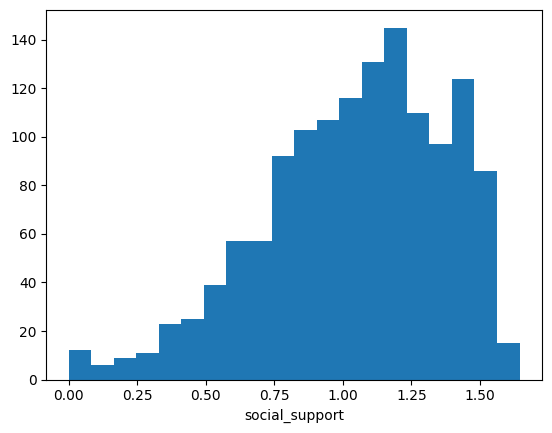

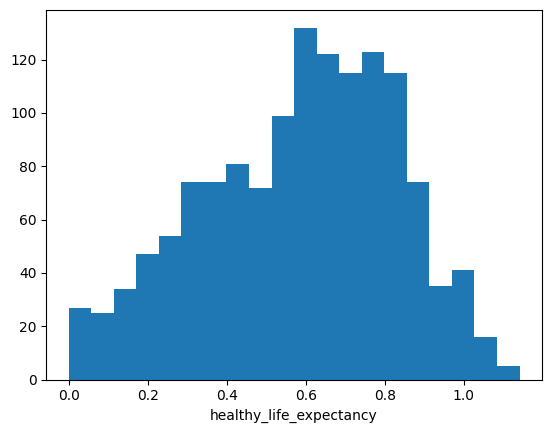

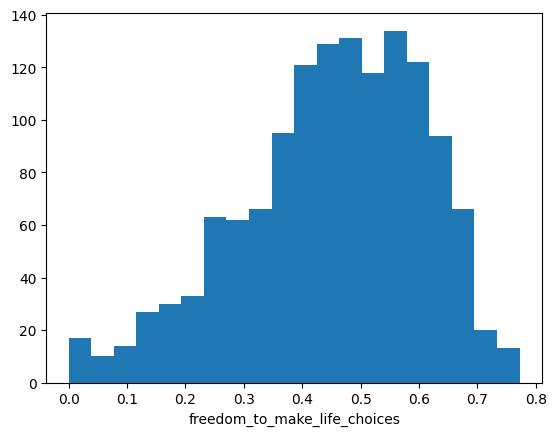

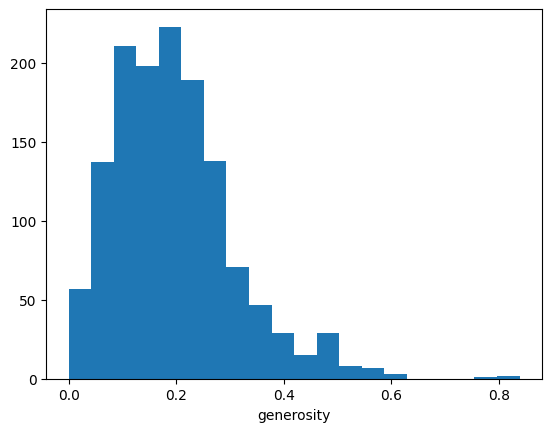

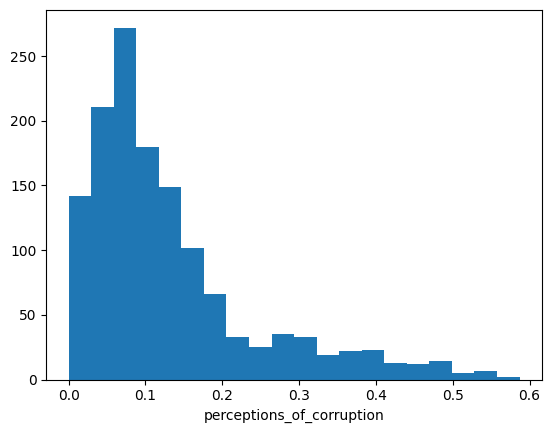

In [ ]:
# Plotagem dos histogramas referentes ao DataFrame geral

for col in df.select_dtypes(include='float'):
  plt.hist(df[col], bins=20)
  plt.xlabel(col)
  plt.show()

### 3.3 Cálculando o skewness para cada histograma

In [ ]:
# Cálculo do Skewness de cada histograma gerado

for col in df.select_dtypes(include='float'):
  data = np.array(df[col])
  skewness = skew(data)
  print(f'O skewness para {col} é de {skewness}')

O skewness para happiness_score é de -0.07700892765252017
O skewness para gdp_per_capita é de -0.09137978529886179
O skewness para social_support é de -0.6088259253402075
O skewness para healthy_life_expectancy é de -0.30282351570065
O skewness para freedom_to_make_life_choices é de -0.5624846056085244
O skewness para generosity é de 1.1400554843737278
O skewness para perceptions_of_corruption é de 1.5582066727275583


### 3.4 Obtando os boxplots gerais

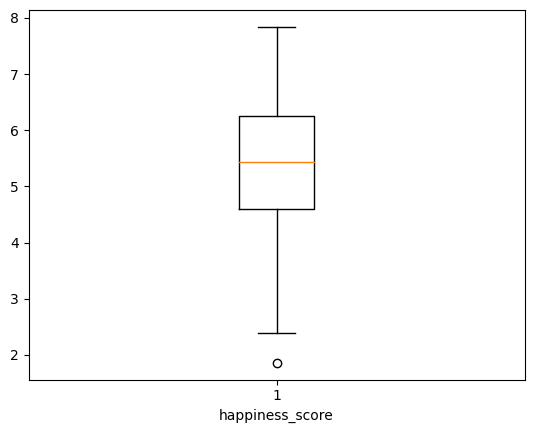

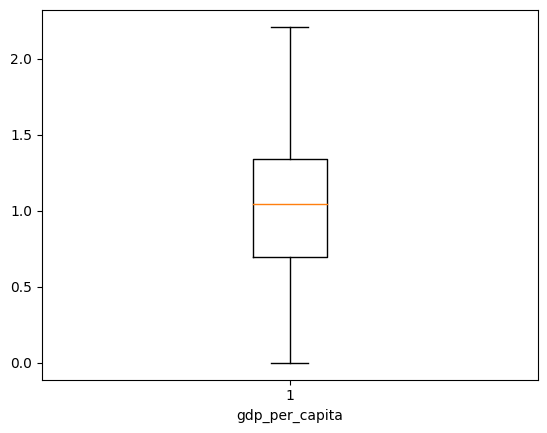

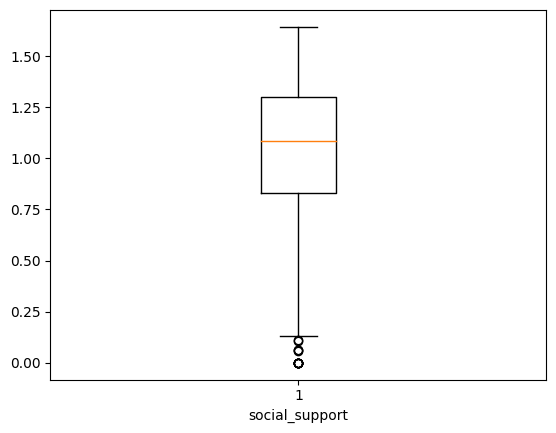

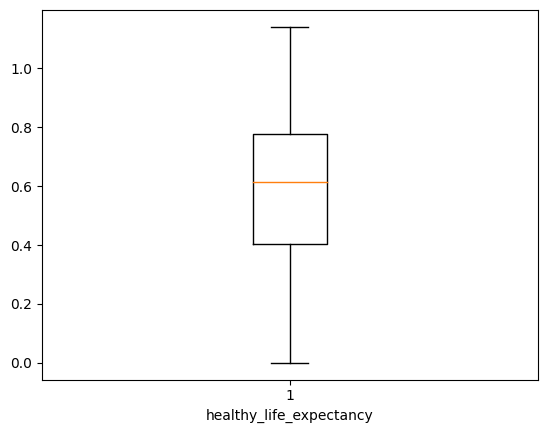

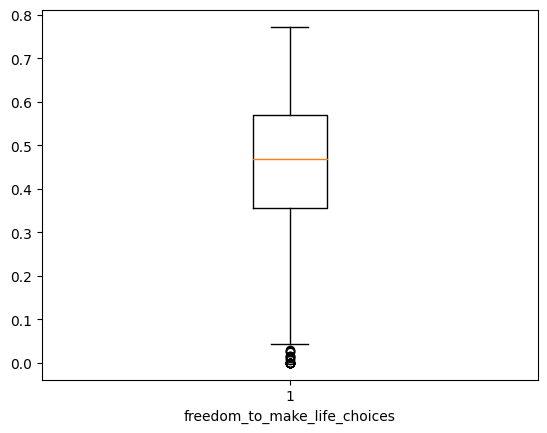

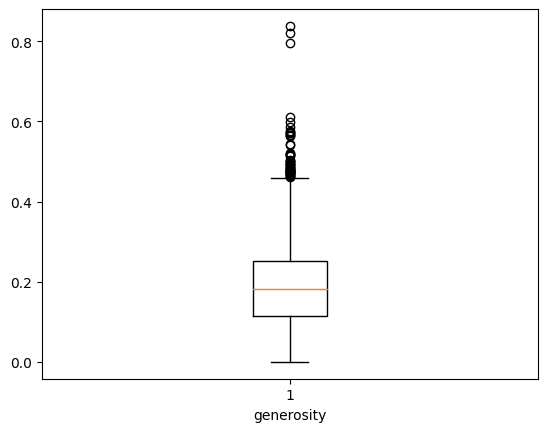

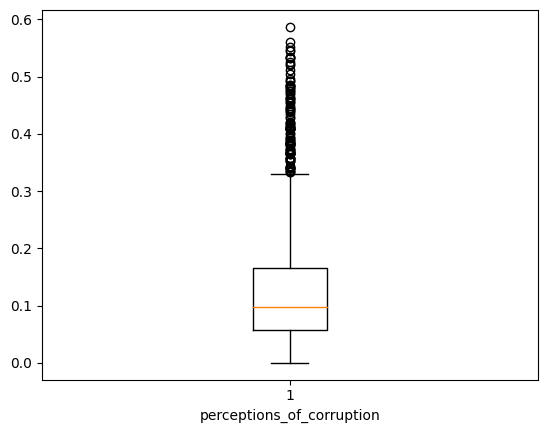

In [ ]:
# Plotagem dos boxplot referentes ao DataFrame geral

for col in df.select_dtypes(include='float'):
  plt.boxplot(df[col])
  plt.xlabel(col)
  plt.show()

### 3.5 Cálculando correlações

In [ ]:
# Cálculo da correlação entre as variáveis apresentadas no DataFrame com o Índice de Felicidade

correlation = {}

for col in df.select_dtypes(include='float'):
  correlation[col] = np.corrcoef(df['happiness_score'], df[col])[0, 1]

sorted_correlation = sorted(correlation.items(), key=lambda x:x[1], reverse=True)
del sorted_correlation[0]
sorted_correlation

for item in sorted_correlation:
  print(f'A correlação entre {item[0]} com o Índice de Felicidade é de {item[1]}')

A correlação entre gdp_per_capita com o Índice de Felicidade é de 0.7237849494320593
A correlação entre healthy_life_expectancy com o Índice de Felicidade é de 0.6824795589848491
A correlação entre social_support com o Índice de Felicidade é de 0.6498436290451894
A correlação entre freedom_to_make_life_choices com o Índice de Felicidade é de 0.5709017429407509
A correlação entre perceptions_of_corruption com o Índice de Felicidade é de 0.4149541173536084
A correlação entre generosity com o Índice de Felicidade é de 0.08210993118693698


As variáveis com maior correlação com o Índice de Felicidade são, respectivamente, a Renda per Capita, a Expectativa de Vida Saudável, e a Rede de Apoio.

In [ ]:
df.groupby('region')['happiness_score'].agg(['mean'])

,mean
region,
Africa,5.057000
Central and Eastern Europe,5.585753
Commonwealth of Independent States,5.639041
East Asia,5.732150
Latin America and Caribbean,5.993861
Middle East and North Africa,5.267986
North America and ANZ,7.176058
South Asia,4.473264
Southeast Asia,5.370429


## 4. Análisando os dados

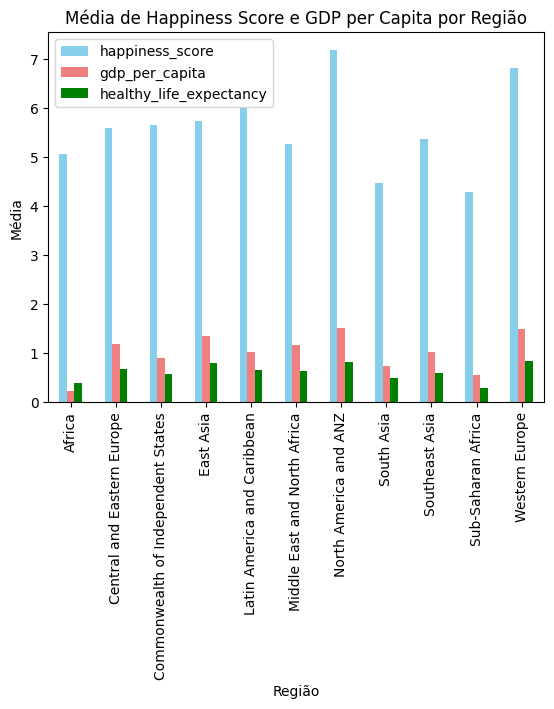

In [ ]:
#grafico de barras regiões com maior e menor indice médio de felicidade e seus respectivos pib percapta

df.groupby('region')[['happiness_score','gdp_per_capita','healthy_life_expectancy']].mean().plot(kind='bar', color=['skyblue', 'lightcoral', 'green'])
plt.xlabel('Região')
plt.ylabel('Média')
plt.title('Média de Happiness Score e GDP per Capita por Região')
plt.show()

In [ ]:
df.groupby('country')['generosity', 'perceptions_of_corruption'].agg(['mean'])

<ipython-input-26-d1c19232609e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('country')['generosity', 'perceptions_of_corruption'].agg(['mean'])


,generosity,perceptions_of_corruption
,mean,mean
country,,
Afghanistan,0.197543,0.040633
Albania,0.161051,0.036707
Algeria,0.087557,0.142410
Angola,0.105269,0.071570
Argentina,0.085551,0.068439
...,...,...
Venezuela,0.097901,0.073205
Vietnam,0.168423,0.096384


In [ ]:
#média de indice de felicidade e pib percapta por pais
df.groupby('country')['happiness_score', 'gdp_per_capita'].agg(['mean'])

<ipython-input-27-ffda342c4bf9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('country')['happiness_score', 'gdp_per_capita'].agg(['mean'])


,happiness_score,gdp_per_capita
,mean,mean
country,,
Afghanistan,2.990767,0.428808
Albania,4.893189,1.055091
Algeria,5.409011,1.074519
Angola,3.872250,0.798380
Argentina,6.243522,1.214182
...,...,...
Venezuela,5.304244,0.764953
Vietnam,5.309500,0.861463


In [ ]:
# Pais com maior indice de felicidade
df.loc[df['happiness_score'].idxmax()]

country                                Finland
region                          Western Europe
happiness_score                          7.842
gdp_per_capita                           1.446
social_support                           1.106
healthy_life_expectancy                  0.741
freedom_to_make_life_choices             0.691
generosity                               0.124
perceptions_of_corruption                0.481
year                                      2021
Name: 935, dtype: object

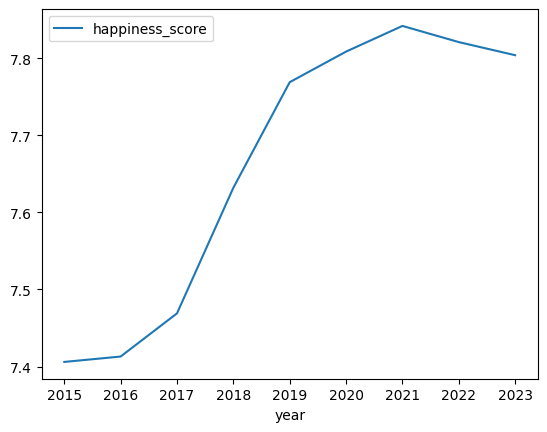

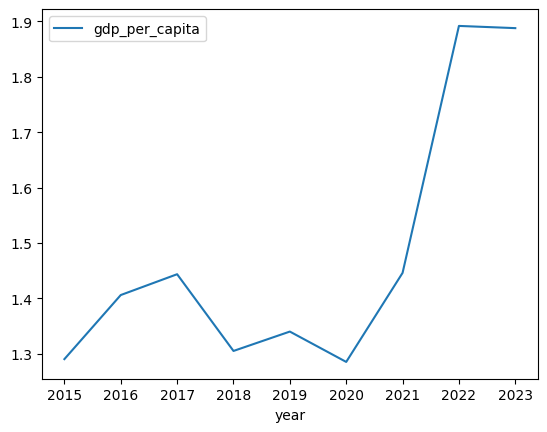

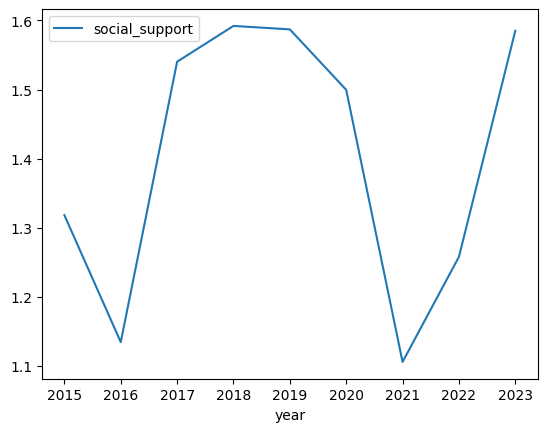

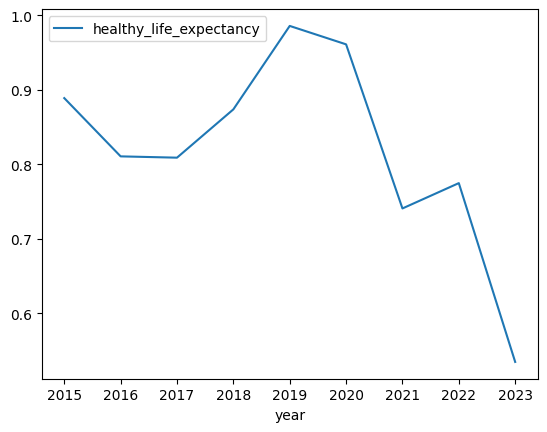

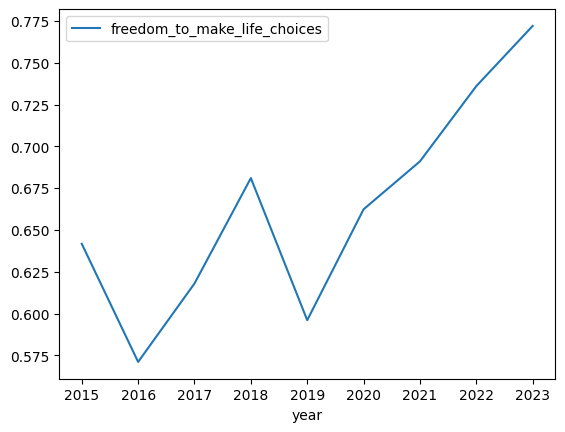

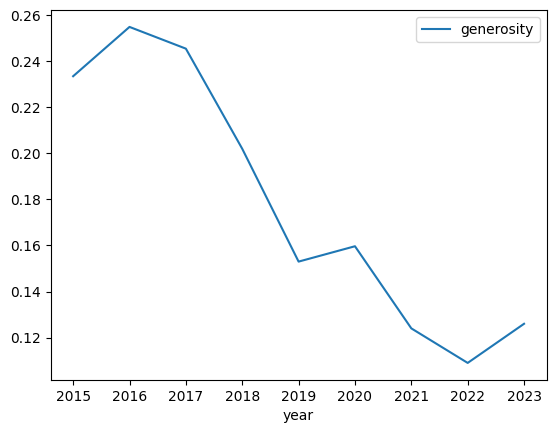

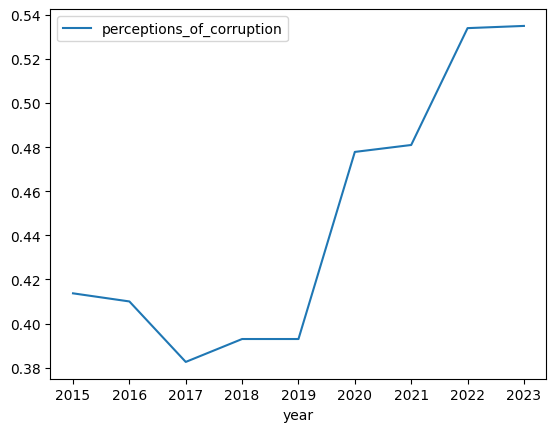

In [ ]:
filtro = (df['country'] == 'Finland')

for col in df.select_dtypes(include='float'):
  df.loc[filtro].plot(x='year', y=col)

In [ ]:
# Pais com menor indice de felicidade
df.loc[df['happiness_score'].idxmin()]

country                         Afghanistan
region                           South Asia
happiness_score                       1.859
gdp_per_capita                        0.645
social_support                          0.0
healthy_life_expectancy               0.087
freedom_to_make_life_choices            0.0
generosity                            0.093
perceptions_of_corruption             0.059
year                                   2023
Name: 1366, dtype: object

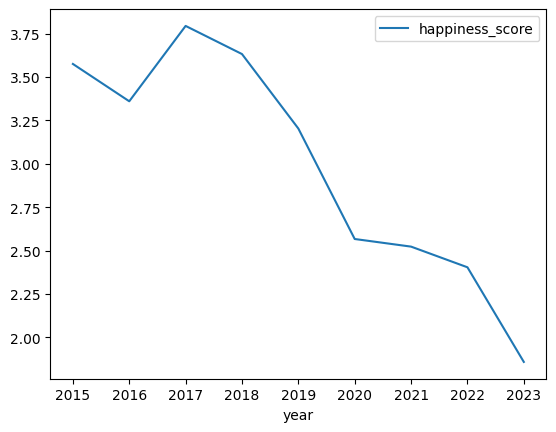

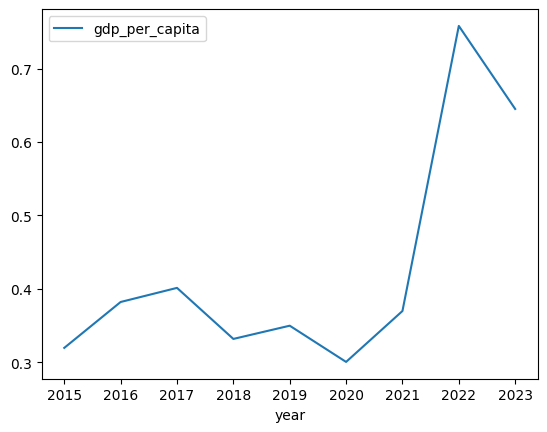

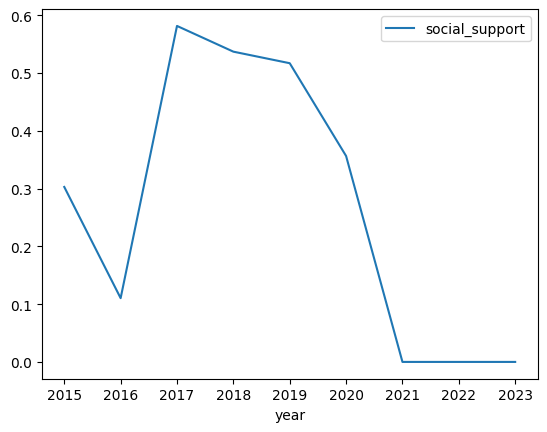

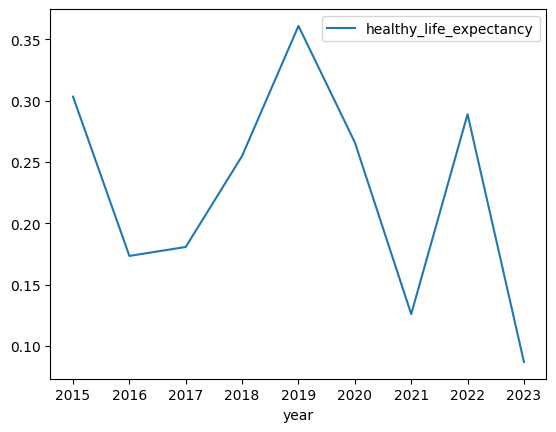

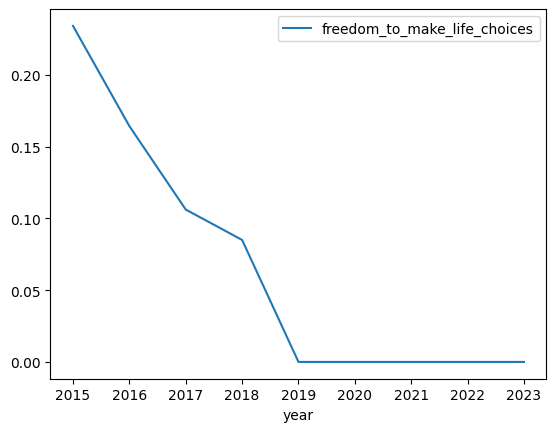

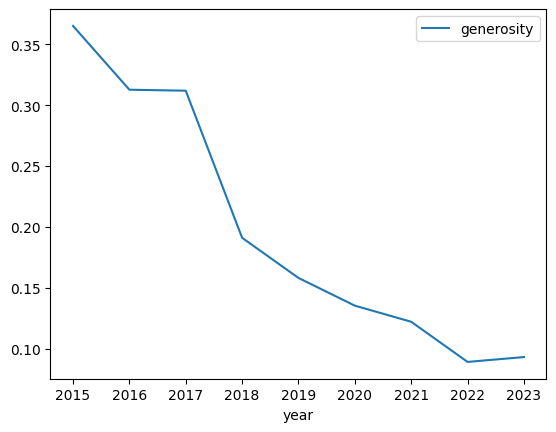

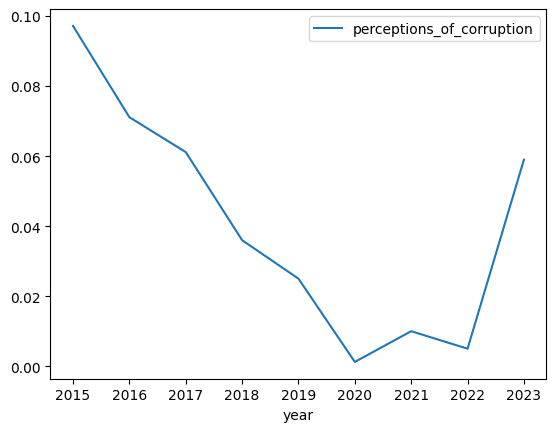

In [ ]:
filtro = (df['country'] == 'Afghanistan')

for col in df.select_dtypes(include='float'):
  df.loc[filtro].plot(x='year', y=col)

Filtrando para analises da America latina

In [ ]:
#filtro América latina
filtered_df = df[df['region'] == 'Latin America and Caribbean'].groupby('country')['happiness_score', 'gdp_per_capita'].agg(['mean'])
filtered_df

<ipython-input-28-ab7c9bed9ae4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  filtered_df = df[df['region'] == 'Latin America and Caribbean'].groupby('country')['happiness_score', 'gdp_per_capita'].agg(['mean'])


,happiness_score,gdp_per_capita
,mean,mean
country,,
Argentina,6.243522,1.214182
Belize,5.956000,0.863712
Bolivia,5.757056,0.878365
Brazil,6.490289,1.118090
Chile,6.428167,1.273292
Colombia,6.142933,1.091640
Costa Rica,7.001378,1.162709
Dominican Republic,5.393022,1.129201


In [ ]:
filtered_df.describe()

,happiness_score,gdp_per_capita
,mean,mean
count,24.000000,24.000000
mean,6.022790,1.022965
std,0.647315,0.231639
min,3.809114,0.313292
25%,5.744564,0.902332
50%,6.142150,1.051771
75%,6.419442,1.190978
max,7.039000,1.359430


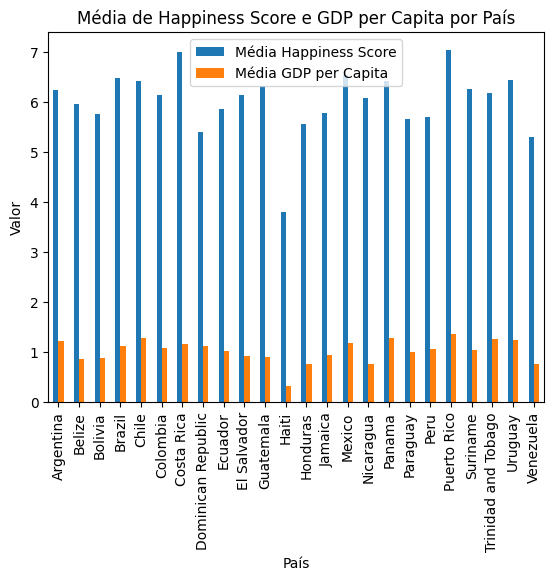

In [ ]:
# Plotar o gráfico de barras com os paises da América latina
filtered_df[['happiness_score', 'gdp_per_capita']].plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Valor')
plt.title('Média de Happiness Score e GDP per Capita por País')
plt.legend(["Média Happiness Score", "Média GDP per Capita"])

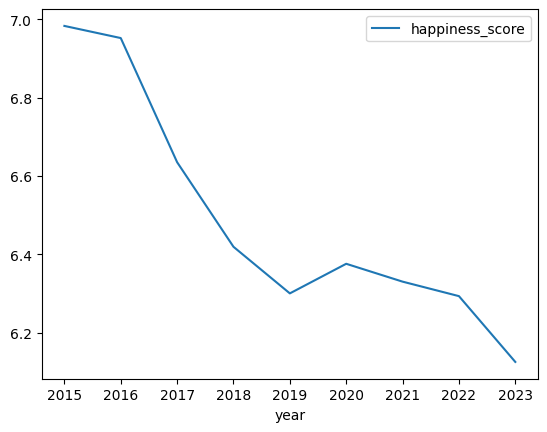

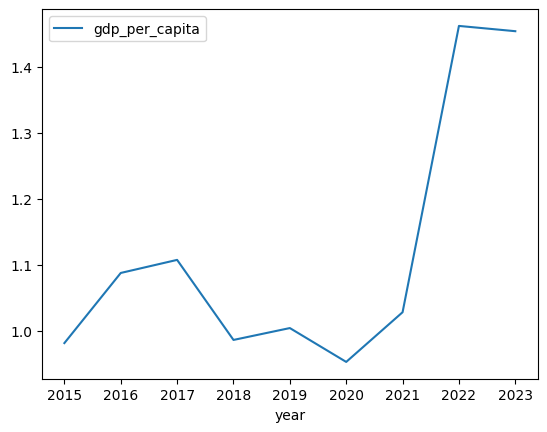

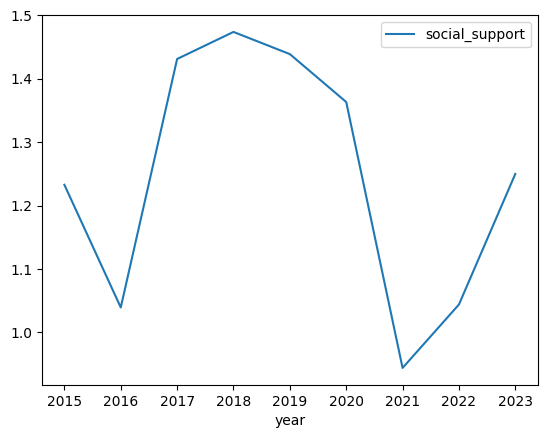

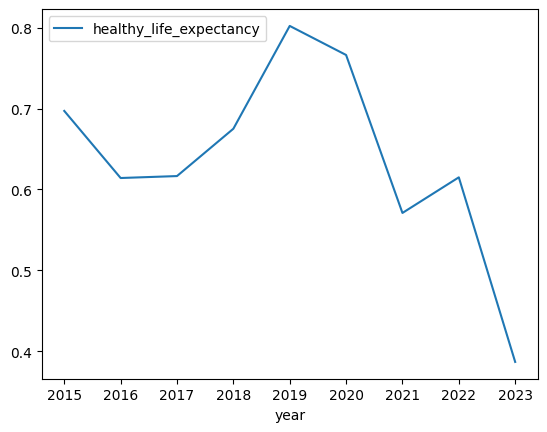

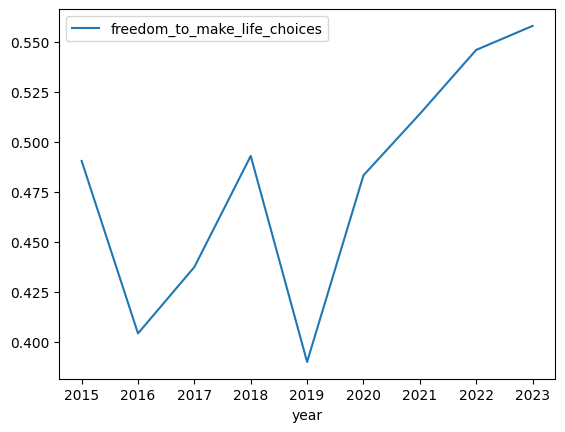

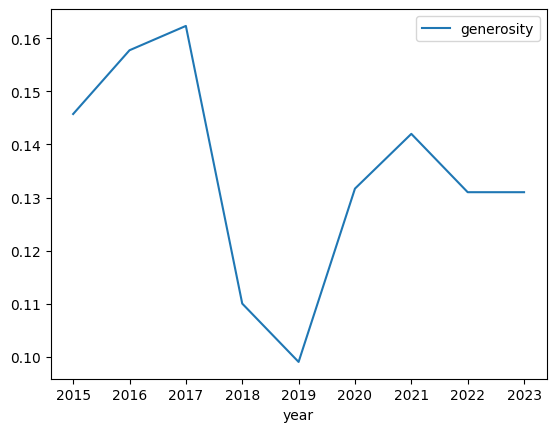

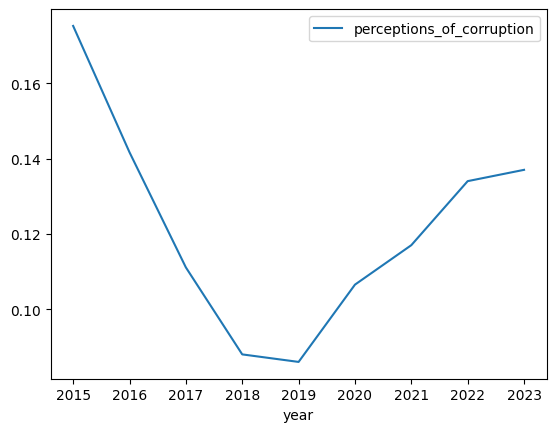

In [ ]:
filtro = (df['country'] == 'Brazil')

for col in df.select_dtypes(include='float').loc[filtro]:
  df.loc[filtro].plot(x = 'year', y = col)